# SECTION 2 TASK 2

In [4]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
import seaborn as sns



### Load the datasets

In [ ]:

X_train_scaled = pd.read_csv("data/X_train.csv")
X_test_scaled = pd.read_csv("data/X_test.csv")
y_train_encoded = pd.read_csv("data/y_train.csv").values.ravel()  # flatten to 1D
y_test_encoded = pd.read_csv("data/y_test.csv").values.ravel()

### K-Means clustering with k=3

In [ ]:
kmeans3 = KMeans(n_clusters=3, random_state=42)
kmeans3.fit(X_train_scaled)
clusters3 = kmeans3.predict(X_train_scaled)

Adjusted Rand Index (k=3): 0.7255937583560352


### Compare clusters with actual labels using Adjusted Rand Index

In [10]:

ari3 = adjusted_rand_score(y_train_encoded, clusters3)
print("Adjusted Rand Index (k=3):", ari3)

Adjusted Rand Index (k=3): 0.7255937583560352


An Adjusted Rand Index of ~0.73 means that  clustering matches the real species labels very ( up to 73%) ,but there’s still some overlap between two of the species hence it is not a perfect 1

### Elbow method to justify optimal k

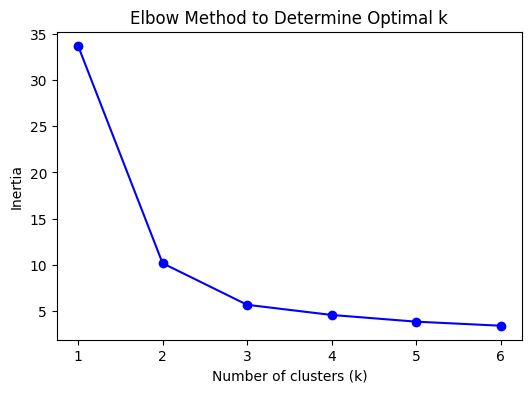

In [ ]:
inertia = []
k_values = range(1, 7)
for k in k_values:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_train_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(k_values, inertia, 'o-', color='blue')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal k')
plt.show()



- k=3 is optimal because it’s the point of diminishing returns (the elbow) and matches the true underlying number of species.

- Fewer clusters (k=1 or 2) underrepresent the diversity, while more clusters (k=4+) do not meaningfully improve cluster separation.

## Visualizing Clusters

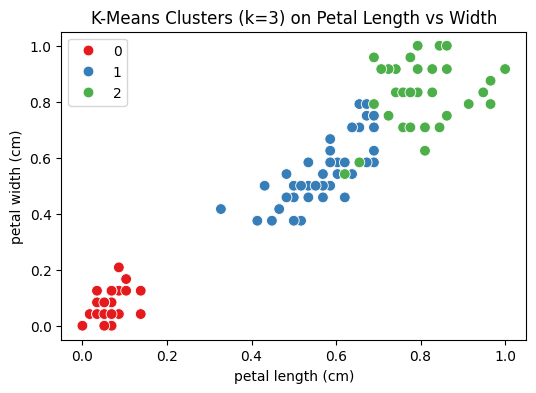

In [ ]:
#Visualize clusters (petal length vs petal width)
plt.figure(figsize=(6,4))
sns.scatterplot(
    x=X_train_scaled['petal length (cm)'],
    y=X_train_scaled['petal width (cm)'],
    hue=clusters3,
    palette='Set1',
    s=60
)
plt.title('K-Means Clusters (k=3) on Petal Length vs Width')
plt.show()


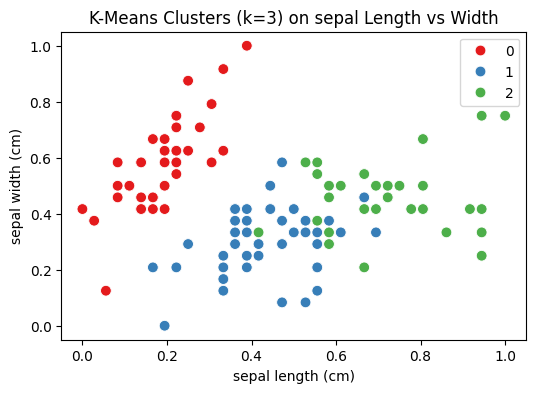

In [ ]:
#Visualize clusters (sepal length vs sepal width)

plt.figure(figsize=(6,4))
sns.scatterplot(
    x=X_train_scaled['sepal length (cm)'],
    y=X_train_scaled['sepal width (cm)'],
    hue=clusters3,
    palette='Set1',
    s=60
)
plt.title('K-Means Clusters (k=3) on sepal Length vs Width')
plt.show()

Cluster 1 and 2 have similar sepal measurements (green and blue) and partially overlapping petal measurements,